In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression

In [2]:
data  = pd.read_csv(r"C:\Users\noobm\Desktop\ML\project KDD\kdd_test.csv")
data.head(50)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,...,57,0.11,0.02,0.01,0.04,0.00,0.00,0.87,0.00,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,...,155,0.80,0.02,0.01,0.00,0.00,0.00,0.00,0.00,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,normal
3,1979,udp,other,SF,145,105,0,0,0,0,...,2,0.01,0.84,1.00,0.00,0.00,0.00,0.00,0.00,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,...,2,0.01,0.68,1.00,0.00,0.00,0.00,1.00,1.00,portsweep
5,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
6,0,tcp,http,SF,294,5499,0,0,0,0,...,255,1.00,0.00,0.50,0.04,0.00,0.00,0.00,0.00,normal
7,0,tcp,http,S0,0,0,0,0,0,0,...,44,0.17,0.03,0.01,0.00,1.00,1.00,0.00,0.00,neptune
8,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,smurf
9,0,udp,private,SF,1,0,0,0,0,0,...,32,0.13,0.45,0.66,0.00,0.03,0.00,0.31,0.00,satan


In [3]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [4]:
data.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [6]:
#converting 
data["labels"] = data["labels"].apply(lambda x:"normal" if x == "normal" else "attack")


In [7]:
con =  data["labels"]
con.sample(10)

21796    attack
254      normal
20193    attack
10278    attack
16441    attack
18246    attack
20845    normal
3185     normal
6123     normal
2974     normal
Name: labels, dtype: object

In [8]:
X = data.drop("labels", axis = 1)
y = data["labels"]
y = y.astype(str)

In [9]:
for col in ["protocol_type","service","flag"]:
    le  = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.11621926, -0.14469687,  1.33701231, ..., -0.5472338 ,
         2.10757861, -0.43811171],
       [-0.11850831,  2.24333116, -1.24691733, ..., -0.5472338 ,
        -0.4569179 , -0.43811171],
       [-0.11850831,  2.24333116, -1.24691733, ..., -0.5472338 ,
        -0.4569179 , -0.43811171],
       ...,
       [-0.11850831, -0.14469687,  1.00573928, ...,  1.87706388,
        -0.4569179 , -0.43811171],
       [-0.11850831, -0.14469687,  1.00573928, ..., -0.5472338 ,
         1.25274644,  2.4149265 ],
       [-0.11850831,  2.24333116, -1.24691733, ..., -0.5472338 ,
        -0.4569179 , -0.43811171]])

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 , random_state = 42, stratify = y)

In [12]:
#((model aval))  Isolation forest 
iso  = IsolationForest(contamination = 0.3,random_state = 42)
iso.fit (X_train)

IsolationForest(contamination=0.3, random_state=42)

In [57]:
y_pred_iso  = iso.predict(X_test)
y_pred_iso  = ["attack" if x == -1 else "normal" for x in y_pred_iso]
y_pred_iso #:)))

['normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'attack',
 'normal',
 'attack',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'attack',
 'normal',
 'attack',
 'attack',
 'attack',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'attack',
 'normal',
 'attack',
 'normal',
 'attack',
 'normal',
 'normal',
 'normal',
 'normal',
 'attack',
 'normal',
 'attack',
 'normal',
 'attack',
 'attack',
 'attack',
 'normal',
 'attack',
 'attack',

In [14]:
print(classification_report(y_test, y_pred_iso))

              precision    recall  f1-score   support

      attack       0.79      0.47      0.59      3390
      normal       0.62      0.87      0.73      3374

    accuracy                           0.67      6764
   macro avg       0.71      0.67      0.66      6764
weighted avg       0.71      0.67      0.66      6764



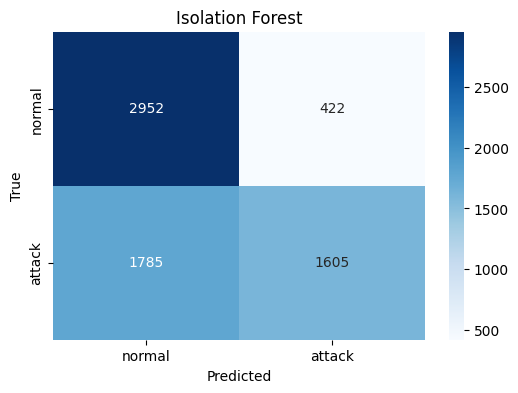

In [15]:
cm_iso = confusion_matrix(y_test,y_pred_iso, labels = ["normal" , "attack"])
plt.figure(figsize = (6,4))
sb.heatmap(cm_iso,annot = True, fmt = "d",cmap = "Blues", 
           xticklabels = ["normal", "attack"],
           yticklabels = ["normal", "attack"])
plt.title("Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [16]:
#model dovom regression 
log_reg = LogisticRegression(max_iter = 200 , solver = "liblinear")
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [17]:
y_pred_log = log_reg.predict(X_test)
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

      attack       0.95      0.91      0.93      3390
      normal       0.92      0.95      0.93      3374

    accuracy                           0.93      6764
   macro avg       0.93      0.93      0.93      6764
weighted avg       0.93      0.93      0.93      6764



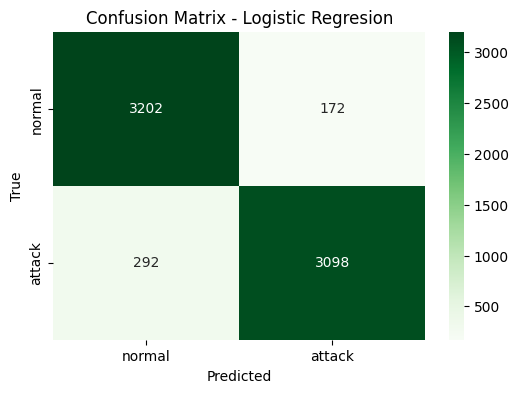

In [18]:
cm_iso = confusion_matrix(y_test,y_pred_log, labels = ["normal" , "attack"])
plt.figure(figsize = (6,4))
sb.heatmap(cm_iso,annot = True, fmt = "d",cmap = "Greens", 
           xticklabels = ["normal", "attack"],
           yticklabels = ["normal", "attack"])
plt.title("Confusion Matrix - Logistic Regresion")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [19]:
#Ye ravesh Digas 
data["attack_cat"] = data["labels"].apply(lambda x:0 if x=="normal" else 1)
data["attack_cat"]

0        0
1        0
2        0
3        0
4        1
        ..
22539    1
22540    0
22541    1
22542    1
22543    0
Name: attack_cat, Length: 22544, dtype: int64

In [20]:
#Logistic regresion
X1 = data.drop(["labels","attack_cat"],axis = 1 )
y1 = data["attack_cat"] 

In [21]:
X1 = pd.get_dummies(X1)

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.3,random_state = 42)

In [51]:
log_regi = LogisticRegression(max_iter = 10000)
log_regi.fit(X1_train, y1_train)
y_pred_lr = log_regi.predict(X1_test)

C:\Users\noobm\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [52]:
lr_score = {
    "Accuracy" : accuracy_score(y1_test,y_pred_lr),
    "Precision" : precision_score(y1_test,y_pred_lr),
    "Recall"   : recall_score(y1_test,y_pred_lr),
    "F1"       : f1_score(y1_test,y_pred_lr)
}
lr_score

{'Accuracy': 0.9213483146067416,
 'Precision': 0.9324242424242424,
 'Recall': 0.9087418783225044,
 'F1': 0.9204307508226144}

In [53]:
iso1  = IsolationForest(contamination = 0.3,random_state = 42)
iso1.fit (X1_train)

IsolationForest(contamination=0.3, random_state=42)

In [54]:
y1_pred_iso = iso1.predict(X1_test)
y1_pred_iso = np.where(y1_pred_iso == -1, 1, 0).astype(int)

In [55]:
# isolation 
iso_score = {
    "Accuracy" : accuracy_score(y1_test,y1_pred_iso),
    "Precision" : precision_score(y1_test,y1_pred_iso),
    "Recall"   : recall_score(y1_test,y1_pred_iso),
    "F1"       : f1_score(y1_test,y1_pred_iso)
}
iso_score

{'Accuracy': 0.6092548787699587,
 'Precision': 0.6849178695868592,
 'Recall': 0.4063792085056113,
 'F1': 0.5101019462465246}

In [28]:
compare_data = pd.DataFrame([lr_score,iso_score],index = ["Logistic Regresion","Isolation Forest"])
compare_data

,Accuracy,Precision,Recall,F1
Logistic Regresion,0.898581,0.929663,0.862670,0.894914
Isolation Forest,0.609255,0.684918,0.406379,0.510102


<Figure size 800x600 with 0 Axes>

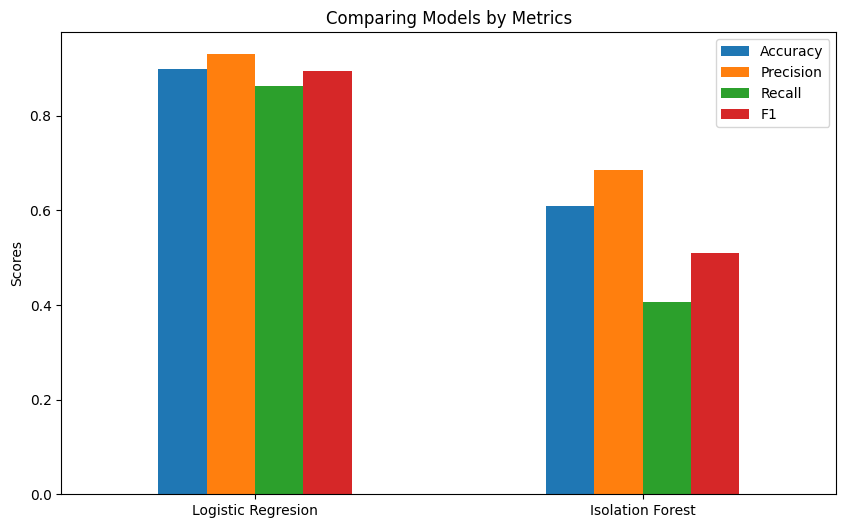

In [56]:
#Rasm plot
plt.figure(figsize =  (8,6))
compare_data.plot(kind = "bar", figsize = (10,6))
plt.title("Comparing Models by Metrics")
plt.ylabel("Scores")
plt.xticks(rotation = 0)
plt.show()

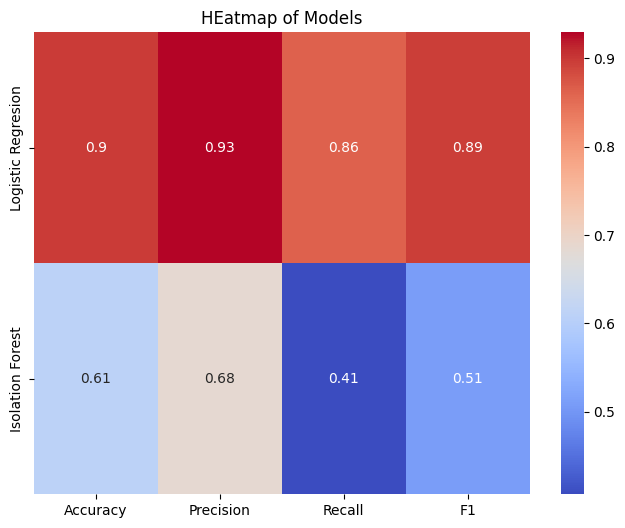

In [30]:
plt.figure(figsize = (8,6))
sb.heatmap(compare_data, annot = True ,cmap = "coolwarm",fmt = ".2")
plt.title("HEatmap of Models")
plt.show()

In [31]:
class_cou  = data["labels"].value_counts()
print(class_cou)

labels
attack    11299
normal    11245
Name: count, dtype: int64


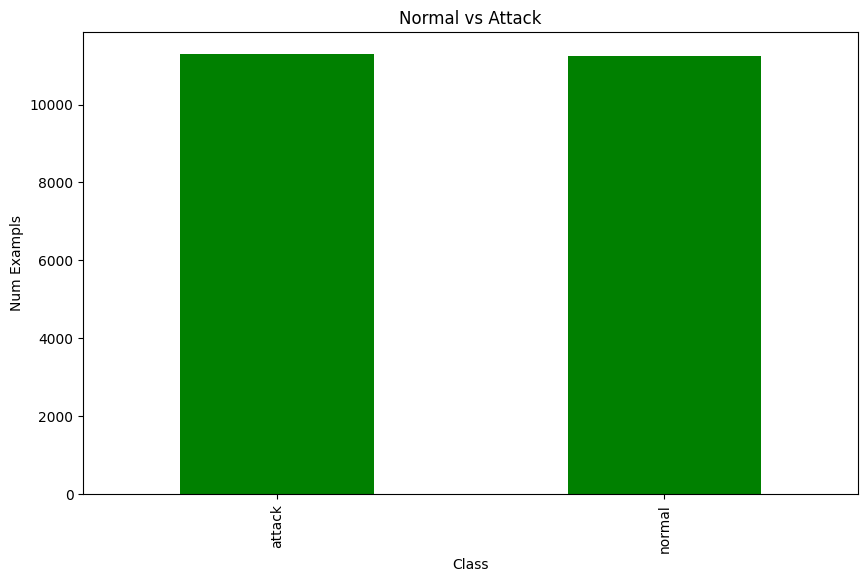

In [32]:
plt.figure(figsize = (10,6))
class_cou.plot(kind = "bar", color = "green")
plt.title("Normal vs Attack")
plt.xlabel("Class")
plt.ylabel("Num Exampls")
plt.show()

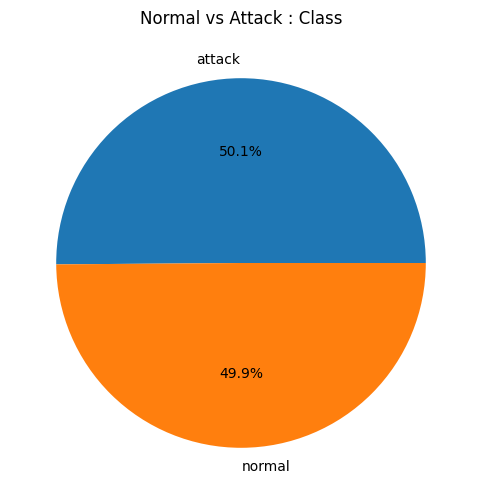

In [45]:
class_cou.plot(kind = "pie" , autopct = "%1.1f%%",figsize = (6,6))
plt.title("Normal vs Attack : Class")
plt.ylabel("")
plt.show()

In [34]:
data["att_ca"] = data["labels"].apply(lambda x:"normal" if x == "normal" else "attack")
data["att_ca"]

0        normal
1        normal
2        normal
3        normal
4        attack
          ...  
22539    attack
22540    normal
22541    attack
22542    attack
22543    normal
Name: att_ca, Length: 22544, dtype: object

In [35]:
summary = data.groupby("att_ca")[["duration","src_bytes","dst_bytes"]].mean()
print(summary)

          duration     src_bytes    dst_bytes
att_ca                                       
attack  362.749535  12823.914329  1366.261085
normal  154.468564  11710.872477  4574.999466


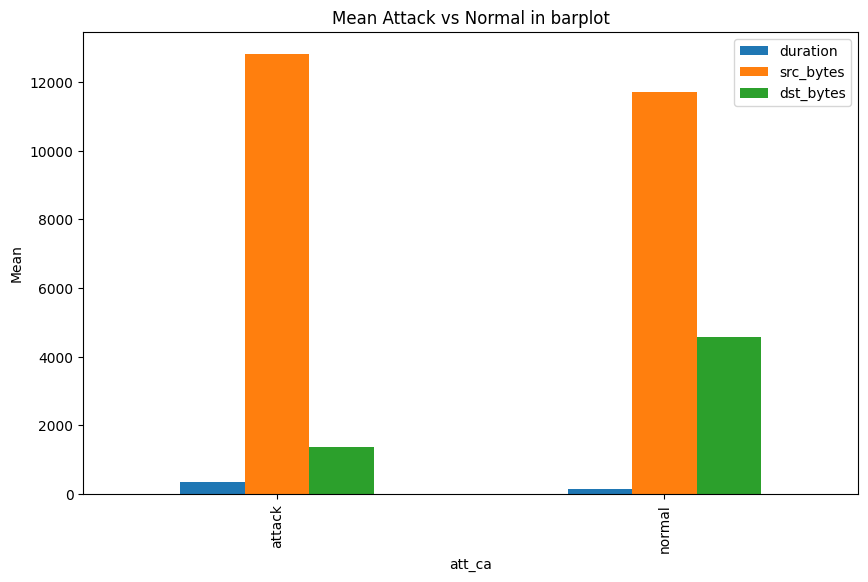

In [36]:
colors = ["#1f77b4","#ff7f0e","#2ca02c"]
summary.plot(kind = "bar" ,color = colors, figsize = (10,6))
plt.title("Mean Attack vs Normal in barplot")
plt.ylabel("Mean")
plt.show()

In [37]:
src_by = data["src_bytes"].value_counts()
src_by

src_bytes
0        8528
1         455
8         454
44        391
1032      350
         ... 
1586        1
1349        1
1111        1
1688        1
61548       1
Name: count, Length: 1517, dtype: int64

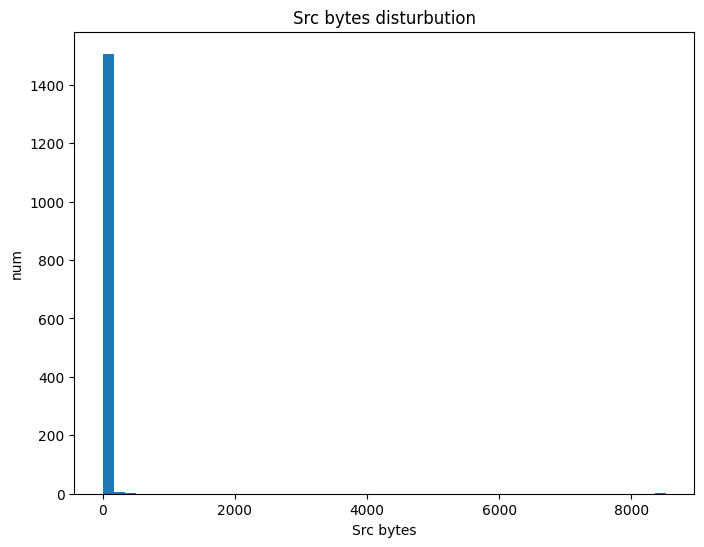

In [46]:
src_by.plot ( kind= "hist" , bins = 50 , figsize = (8,6))
plt.title("Src bytes disturbution")
plt.xlabel("Src bytes")
plt.ylabel("num")
plt.show()

In [39]:
pro_counts = data["protocol_type"].value_counts()
pro_counts

protocol_type
tcp     18508
udp      2701
icmp     1335
Name: count, dtype: int64

In [40]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels', 'attack_cat', 'att_ca'],
      dtype='object')

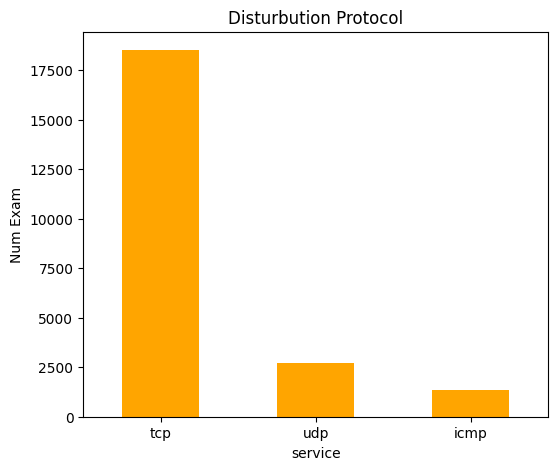

In [41]:
plt.figure(figsize = (6,5))
pro_counts.plot( kind  = "bar" , color = "orange")
plt.title("Disturbution Protocol")
plt.xlabel("service")
plt.ylabel("Num Exam")
plt.xticks(rotation = 0)
plt.show()

In [42]:
ser_count = data["service"].value_counts().head(20)
ser_count

service
http         7307
private      4185
domain_u     1435
smtp         1180
ftp_data     1067
telnet        846
other         809
eco_i         626
ecr_i         624
ftp           415
pop_3         365
finger        280
imap4         162
auth          140
uucp_path     123
Z39_50        120
uucp          119
iso_tsap      107
whois         104
courier       104
Name: count, dtype: int64

In [43]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels', 'attack_cat', 'att_ca'],
      dtype='object')

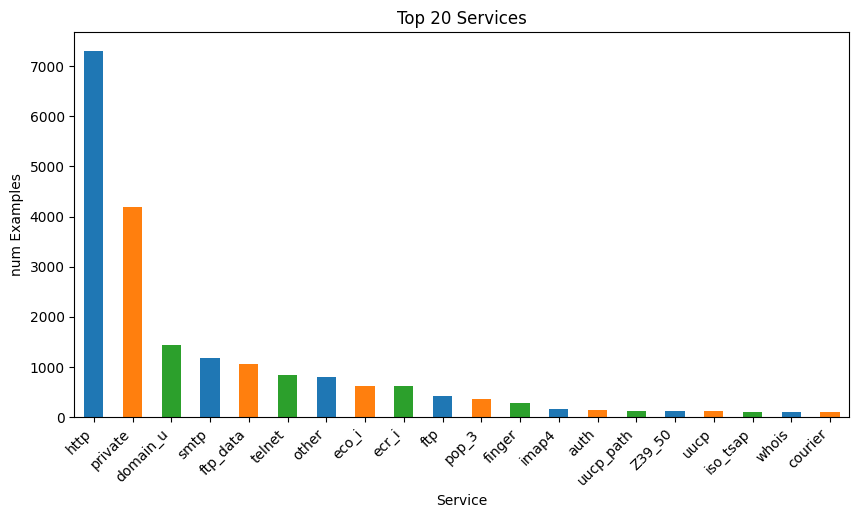

In [44]:
colors = ["#1f77b4","#ff7f0e","#2ca02c"]
ser_count.plot(kind = "bar" ,color = colors, figsize = (10,5))
plt.title("Top 20 Services")
plt.xlabel("Service")
plt.ylabel("num Examples")
plt.xticks(rotation = 45 , ha = "right")
plt.show()